# Q1. Feature Selection and Multicollinearity

## 1. L1 vs L2 Regularization Geometry

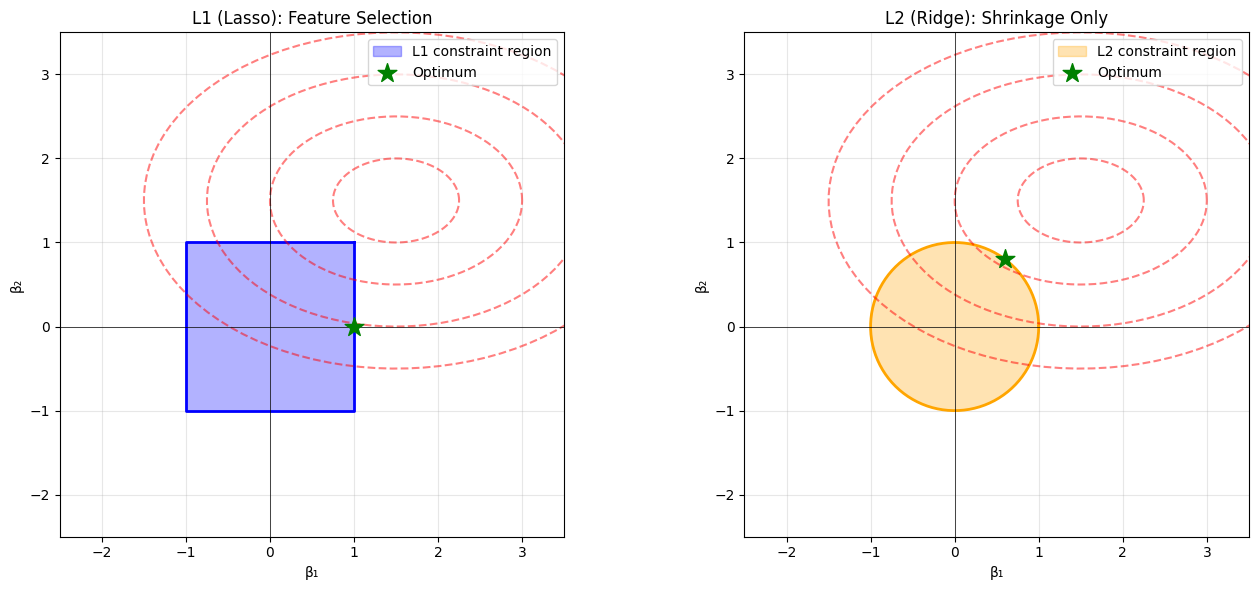

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
theta = np.linspace(0, 2*np.pi, 100)

# L1 (Lasso) - diamond shape
ax1 = axes[0]
t = np.linspace(0, 2*np.pi, 5)
l1_x = np.cos(t + np.pi/4) * np.sqrt(2)
l1_y = np.sin(t + np.pi/4) * np.sqrt(2)
ax1.fill(l1_x, l1_y, alpha=0.3, color='blue', label='L1 constraint region')
ax1.plot(l1_x, l1_y, 'b-', linewidth=2)

for r in [0.5, 1.0, 1.5, 2.0]:
    ellipse_x = r * 1.5 * np.cos(theta) + 1.5
    ellipse_y = r * np.sin(theta) + 1.5
    ax1.plot(ellipse_x, ellipse_y, 'r--', alpha=0.5)

ax1.scatter([1], [0], s=200, c='green', marker='*', zorder=5, label='Optimum')
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax1.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax1.set_xlim(-2.5, 3.5)
ax1.set_ylim(-2.5, 3.5)
ax1.set_xlabel('β₁')
ax1.set_ylabel('β₂')
ax1.set_title('L1 (Lasso): Feature Selection')
ax1.legend(loc='upper right')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# L2 (Ridge) - circle
ax2 = axes[1]
circle_x = np.cos(theta)
circle_y = np.sin(theta)
ax2.fill(circle_x, circle_y, alpha=0.3, color='orange', label='L2 constraint region')
ax2.plot(circle_x, circle_y, 'orange', linewidth=2)

for r in [0.5, 1.0, 1.5, 2.0]:
    ellipse_x = r * 1.5 * np.cos(theta) + 1.5
    ellipse_y = r * np.sin(theta) + 1.5
    ax2.plot(ellipse_x, ellipse_y, 'r--', alpha=0.5)

ax2.scatter([0.6], [0.8], s=200, c='green', marker='*', zorder=5, label='Optimum')
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax2.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax2.set_xlim(-2.5, 3.5)
ax2.set_ylim(-2.5, 3.5)
ax2.set_xlabel('β₁')
ax2.set_ylabel('β₂')
ax2.set_title('L2 (Ridge): Shrinkage Only')
ax2.legend(loc='upper right')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../output/Q1/l1_vs_l2_geometry.png', dpi=150, bbox_inches='tight')
plt.show()

## 2. Lasso Feature Selection

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

np.random.seed(42)
X, y = make_classification(
    n_samples=1000, n_features=100, n_informative=10, n_redundant=20,
    n_clusters_per_class=2, random_state=42
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Data shape: {X.shape}")
print(f"Class distribution: {np.bincount(y)}")

Data shape: (1000, 100)
Class distribution: [500 500]


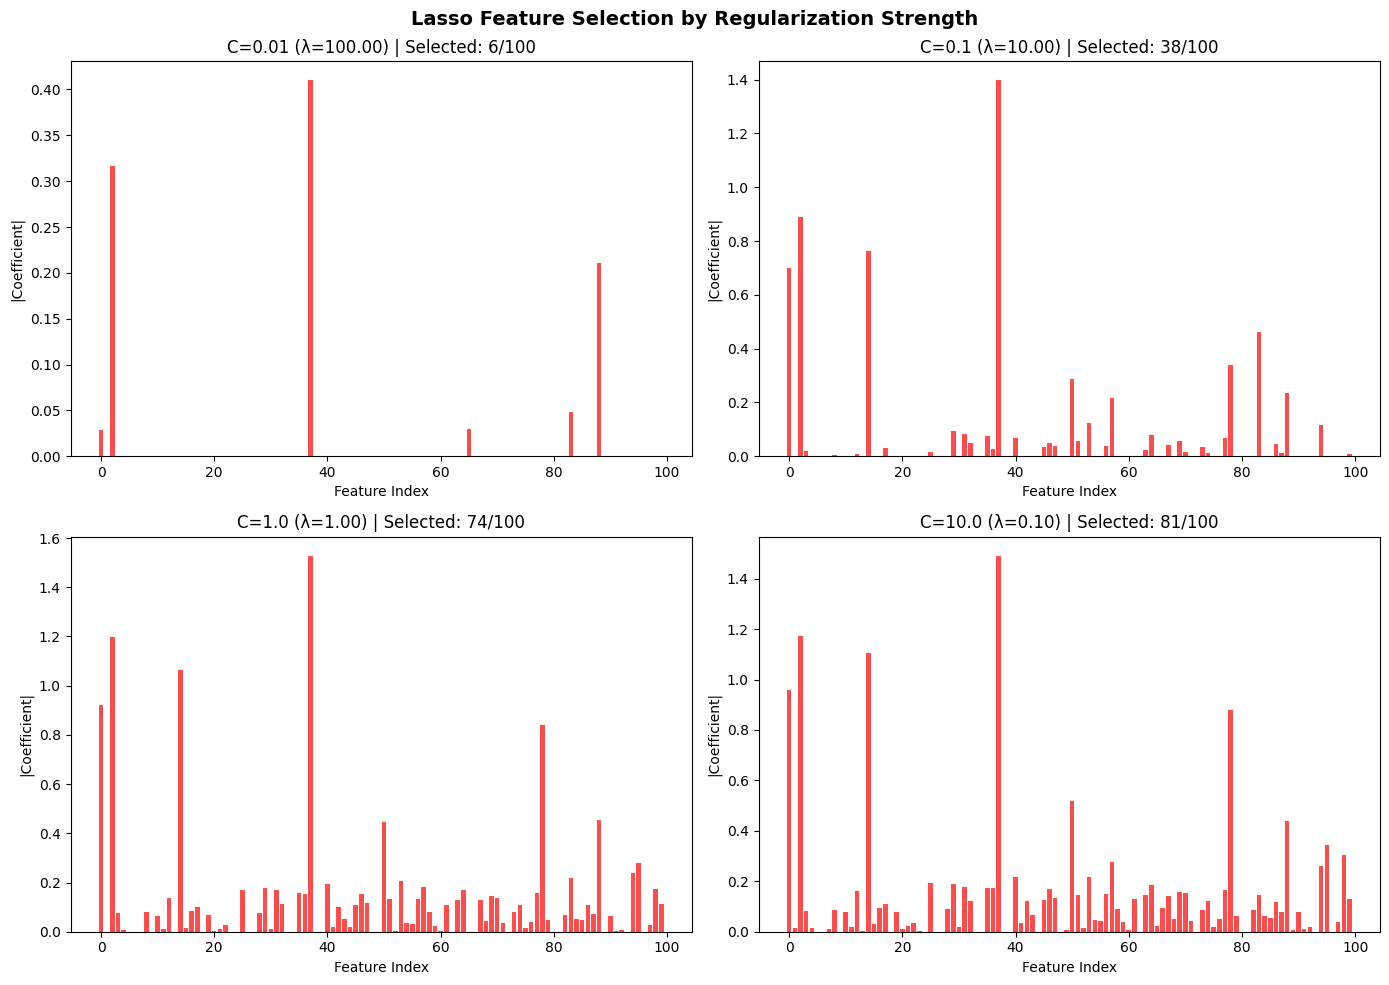

In [3]:
C_values = [0.01, 0.1, 1.0, 10.0]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, C in enumerate(C_values):
    model = LogisticRegression(penalty='l1', C=C, solver='saga', max_iter=5000, random_state=42)
    model.fit(X_scaled, y)
    
    coef = model.coef_[0]
    non_zero = np.sum(coef != 0)
    
    ax = axes[idx]
    colors = ['red' if c != 0 else 'lightgray' for c in coef]
    ax.bar(range(len(coef)), np.abs(coef), color=colors, alpha=0.7)
    ax.set_xlabel('Feature Index')
    ax.set_ylabel('|Coefficient|')
    ax.set_title(f'C={C} (λ={1/C:.2f}) | Selected: {non_zero}/100')

plt.suptitle('Lasso Feature Selection by Regularization Strength', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../output/Q1/lasso_feature_selection.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Multicollinearity Analysis

In [4]:
import seaborn as sns

np.random.seed(42)
n_samples = 1000

income = np.random.normal(50000, 15000, n_samples)
age = np.random.normal(40, 10, n_samples)
employment_years = np.random.normal(10, 5, n_samples)
monthly_income = income / 12 + np.random.normal(0, 500, n_samples)
credit_limit = income * 0.3 + np.random.normal(0, 2000, n_samples)

y_prob = 1 / (1 + np.exp(-(0.00003*income + 0.02*age + 0.05*employment_years - 5)))
y_multi = (np.random.random(n_samples) < y_prob).astype(int)

df_multi = pd.DataFrame({
    'annual_income': income, 'monthly_income': monthly_income, 'credit_limit': credit_limit,
    'age': age, 'employment_years': employment_years, 'target': y_multi
})

correlation_matrix = df_multi.drop('target', axis=1).corr()
print(correlation_matrix.round(3))

                  annual_income  monthly_income  credit_limit    age  \
annual_income             1.000           0.921         0.910 -0.040   
monthly_income            0.921           1.000         0.841 -0.059   
credit_limit              0.910           0.841         1.000 -0.045   
age                      -0.040          -0.059        -0.045  1.000   
employment_years          0.022           0.029         0.035 -0.011   

                  employment_years  
annual_income                0.022  
monthly_income               0.029  
credit_limit                 0.035  
age                         -0.011  
employment_years             1.000  


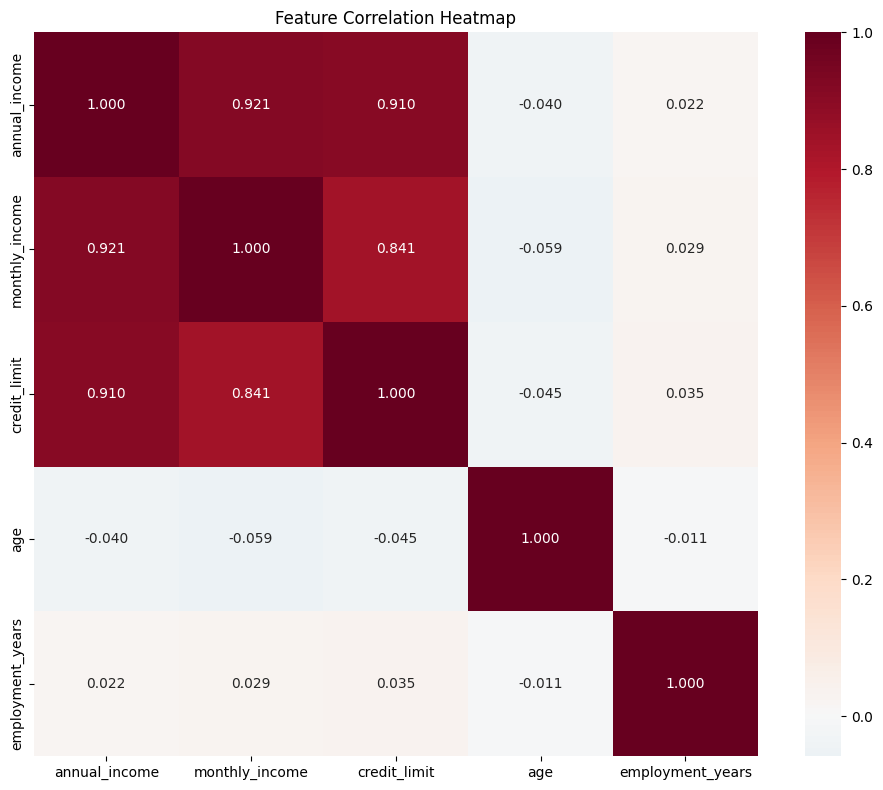

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.3f', square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('../output/Q1/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. VIF Analysis

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df_multi.drop('target', axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values('VIF', ascending=False).to_string(index=False))
print("\nVIF > 10: high multicollinearity")

         Feature        VIF
   annual_income 140.199036
  monthly_income  73.167302
    credit_limit  63.057854
             age   8.502940
employment_years   4.579006

VIF > 10: high multicollinearity


## 5. Model Comparison: Logistic Regression vs Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

X_multi = df_multi.drop('target', axis=1)
y_multi = df_multi['target']

scaler = StandardScaler()
X_multi_scaled = scaler.fit_transform(X_multi)

n_iterations = 50
lr_coefs = []
rf_importances = []

for i in range(n_iterations):
    indices = np.random.choice(len(X_multi_scaled), size=len(X_multi_scaled), replace=True)
    X_boot = X_multi_scaled[indices]
    y_boot = y_multi.values[indices]
    
    lr = LogisticRegression(max_iter=1000, random_state=i)
    lr.fit(X_boot, y_boot)
    lr_coefs.append(lr.coef_[0])
    
    rf = RandomForestClassifier(n_estimators=100, random_state=i, n_jobs=-1)
    rf.fit(X_boot, y_boot)
    rf_importances.append(rf.feature_importances_)

lr_coefs = np.array(lr_coefs)
rf_importances = np.array(rf_importances)

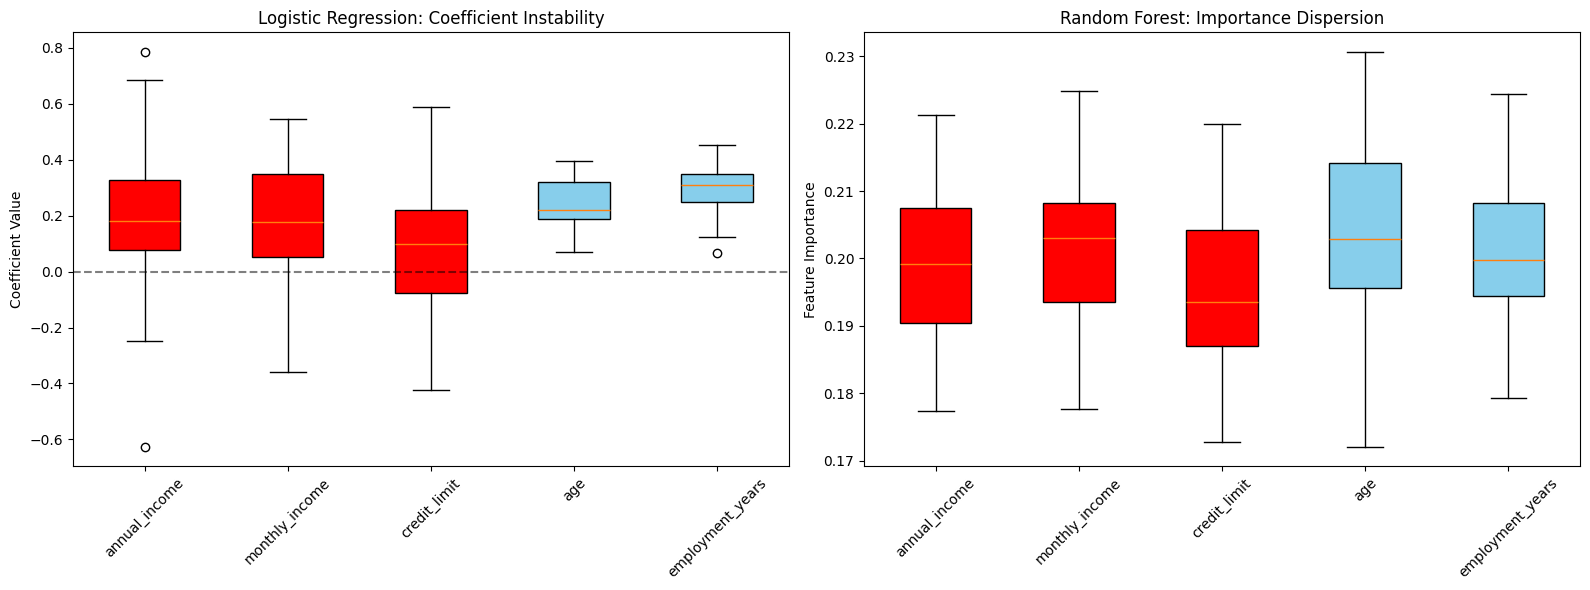

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
feature_names_multi = X_multi.columns.tolist()

ax1 = axes[0]
bp1 = ax1.boxplot(lr_coefs, labels=feature_names_multi, patch_artist=True)
colors = ['red' if 'income' in name or 'credit' in name else 'skyblue' for name in feature_names_multi]
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_ylabel('Coefficient Value')
ax1.set_title('Logistic Regression: Coefficient Instability')
ax1.tick_params(axis='x', rotation=45)

ax2 = axes[1]
bp2 = ax2.boxplot(rf_importances, labels=feature_names_multi, patch_artist=True)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_ylabel('Feature Importance')
ax2.set_title('Random Forest: Importance Dispersion')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../output/Q1/multicollinearity_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Results Summary

In [9]:
print("Logistic Regression Coefficients (mean ± std)")
for i, name in enumerate(feature_names_multi):
    mean_coef = np.mean(lr_coefs[:, i])
    std_coef = np.std(lr_coefs[:, i])
    cv = abs(std_coef / mean_coef) * 100 if mean_coef != 0 else float('inf')
    print(f"{name:20s}: {mean_coef:8.4f} ± {std_coef:.4f} (CV: {cv:.1f}%)")

print("\nRandom Forest Feature Importance (mean ± std)")
for i, name in enumerate(feature_names_multi):
    mean_imp = np.mean(rf_importances[:, i])
    std_imp = np.std(rf_importances[:, i])
    cv = abs(std_imp / mean_imp) * 100 if mean_imp != 0 else float('inf')
    print(f"{name:20s}: {mean_imp:8.4f} ± {std_imp:.4f} (CV: {cv:.1f}%)")

Logistic Regression Coefficients (mean ± std)
annual_income       :   0.1887 ± 0.2551 (CV: 135.2%)
monthly_income      :   0.1798 ± 0.1979 (CV: 110.1%)
credit_limit        :   0.0870 ± 0.2078 (CV: 238.7%)
age                 :   0.2380 ± 0.0848 (CV: 35.6%)
employment_years    :   0.2988 ± 0.0883 (CV: 29.5%)

Random Forest Feature Importance (mean ± std)
annual_income       :   0.1998 ± 0.0104 (CV: 5.2%)
monthly_income      :   0.2019 ± 0.0105 (CV: 5.2%)
credit_limit        :   0.1944 ± 0.0114 (CV: 5.9%)
age                 :   0.2036 ± 0.0137 (CV: 6.7%)
employment_years    :   0.2004 ± 0.0103 (CV: 5.1%)


In [10]:
summary_data = {
    'Category': ['Multicollinearity Sensitivity', 'Coefficient Stability', 'Interpretability', 'Predictive Performance'],
    'Logistic Regression': ['High', 'Low (high variance)', 'Difficult', 'May degrade'],
    'Random Forest': ['Low', 'Medium', 'Medium', 'Maintained']
}

summary_df = pd.DataFrame(summary_data)
print("\nSummary: Multicollinearity Effects by Model")
print(summary_df.to_string(index=False))


Summary: Multicollinearity Effects by Model
                     Category Logistic Regression Random Forest
Multicollinearity Sensitivity                High           Low
        Coefficient Stability Low (high variance)        Medium
             Interpretability           Difficult        Medium
       Predictive Performance         May degrade    Maintained
